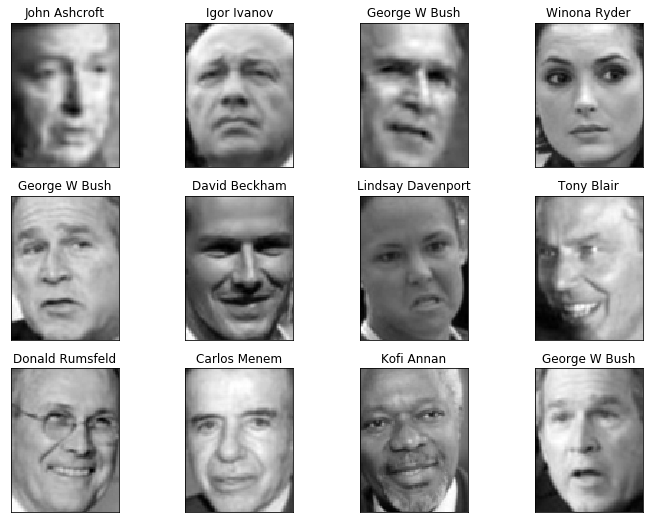

In [10]:
#PAC主成分分析法用于特征提取
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person= 20, resize=0.8)
image_shape = faces.images[0].shape

fig, axes = plt.subplots(3, 4, figsize = (12, 9),
                        subplot_kw = {'xticks':(), 'yticks':()})

for target, image, ax in zip(faces.target, faces.images, axes.ravel()):
    ax.imshow(image, cmap = plt.cm.gray)
    ax.set_title(faces.target_names[target])
plt.show()

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data/255, faces.target, random_state=62)

mlp = MLPClassifier(hidden_layer_sizes=[100, 100], random_state=62, max_iter=400)

mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))

0.565406976744186


In [20]:
from sklearn.decomposition import PCA
pca = PCA(whiten= True,n_components=0.9,random_state=62)
pca.fit(X_train)

X_train_whiten = pca.transform(X_train)
X_test_whiten = pca.transform(X_test)
print(X_train_whiten.shape)

(2061, 105)


In [21]:
mlp.fit(X_train_whiten, y_train)
print(mlp.score(X_test_whiten, y_test))

0.5901162790697675


In [25]:
#NMF非负矩阵分解用于特征提取
from sklearn.decomposition import NMF
nmf = NMF(n_components=105, random_state=62)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print(X_train_nmf.shape)

(2061, 105)


In [26]:
mlp.fit(X_train_nmf, y_train)
print(mlp.score(X_test_nmf, y_test))

0.5973837209302325


D:\RJAZ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
